In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('breast_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,...,13.500,15.64,86.97,549.1,0.13850,0.12660,0.124200,0.093910,0.2827,0.06771
1,8910251,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,...,11.880,22.94,78.28,424.8,0.12130,0.25150,0.191600,0.079260,0.2940,0.07587
2,905520,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,...,12.410,26.44,79.93,471.4,0.13690,0.14820,0.106700,0.074310,0.2998,0.07881
3,868871,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,...,11.920,15.77,76.53,434.0,0.13670,0.18220,0.086690,0.086110,0.2102,0.06784
4,9012568,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,...,16.200,15.73,104.50,819.1,0.11260,0.17370,0.136200,0.081780,0.2487,0.06766
5,906539,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,...,13.070,26.98,86.43,520.5,0.12490,0.19370,0.256000,0.066640,0.3035,0.08284
6,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.363000,0.096530,0.2112,0.08732
7,87880,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,...,19.200,41.85,128.50,1153.0,0.22260,0.52090,0.464600,0.201300,0.4432,0.10860
8,862989,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,...,11.540,23.31,74.22,402.8,0.12190,0.14860,0.079870,0.032030,0.2826,0.07552
9,89827,B,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,...,11.920,19.90,79.76,440.0,0.14180,0.22100,0.229900,0.107500,0.3301,0.09080


In [3]:
#delete redundant columns
df.drop(columns=['id'],inplace=True)
df.drop(columns=['perimeter_mean'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se         569 non-null float64
radius_worst         569 non-null float64
texture_worst 

In [5]:
df.corr()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
radius_mean,1.000000,0.323782,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
area_mean,0.987357,0.321086,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.822529,0.293464,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
dimension_mean,-0.311631,-0.076437,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
radius_se,0.679090,0.275869,0.732562,0.301467,0.497473,0.631925,0.698050,0.303379,0.000111,1.000000,...,0.715065,0.194799,0.719684,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


In [6]:
aa=df.corr()

col=[]
row=[]
val=[]
for i in range(len(aa.columns)):
    for j in range(len(aa.index)):
        if aa.iloc[i,j]>0.75 and aa.iloc[i,j]!=1:
            col.append(aa.columns[i])
            row.append(aa.index[j])
            val.append(round(aa.iloc[i,j],4))



In [7]:
x=pd.DataFrame({'col':col,'row':row,'corr':val})
x.sort_values(by='corr',ascending=False)

,col,row,corr
62,perimeter_worst,radius_worst,0.9937
54,radius_worst,perimeter_worst,0.9937
6,area_mean,radius_mean,0.9874
0,radius_mean,area_mean,0.9874
55,radius_worst,area_worst,0.9840
70,area_worst,radius_worst,0.9840
63,perimeter_worst,area_worst,0.9776
71,area_worst,perimeter_worst,0.9776
36,perimeter_se,radius_se,0.9728
33,radius_se,perimeter_se,0.9728


In [8]:
#Define X and Y variables
X=df.drop('diagnosis',axis=1)
y=df[['diagnosis']]

In [9]:

#Convert categorical vriables to dummy variables
y = pd.get_dummies(y, drop_first=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
#Build the logistic regression model          #On large datasets,statsmodel doesnt work , then use logit
import statsmodels.api as sm

logit = sm.GLM(y_train,sm.add_constant(X_train))       # change 'Logit' to'GLM'(Generalized Linear Model)
lg = logit.fit()

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            diagnosis_M   No. Observations:                  398
Model:                            GLM   Df Residuals:                      368
Model Family:                Gaussian   Df Model:                           29
Link Function:               identity   Scale:                        0.054339
Method:                          IRLS   Log-Likelihood:                 30.448
Date:                Wed, 24 Jul 2019   Deviance:                       19.997
Time:                        15:41:58   Pearson chi2:                     20.0
No. Iterations:                     3   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5038      0.520     -2.893      0.004      -2.523      -0.485
radius_mean          -0.2155   

In [12]:
#Calculate Odds Ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef
lgcoef.to_csv('logit.csv')

In [13]:
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)         # alpha here is 0.1 i.e 90% confidence in order to identify
                                                                      # borderline data
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
smoothness_se,17.76,51666905.35,1.00,0.02
symmetry_se,6.35,572.34,1.00,0.06
dimension_worst,5.46,235.88,1.00,0.07
radius_worst,0.30,1.35,0.58,0.00
area_mean,0.00,1.00,0.50,0.05
area_worst,-0.00,1.00,0.50,0.00
radius_mean,-0.22,0.81,0.45,0.01
const,-1.50,0.22,0.18,0.00
compactness_mean,-2.30,0.10,0.09,0.07


In [14]:
#Predict for train test

In [15]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Cost (C) is cost paid for a misclassification.If cost is high, overfit occurs and if it is low, bias occurs. Keep trying all values until you reach a optimum value for a generalizable model.By default, it is 1.

In [16]:
logreg.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=uint8)

In [17]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[252   5]
 [ 11 130]]


In [18]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[95  5]
 [ 6 65]]


In [19]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

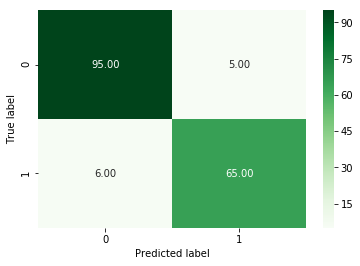

In [20]:
draw_cm(y_test, pred_test)

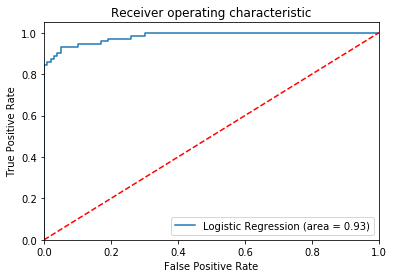

In [21]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [22]:
auc_score = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )


0.98

In [23]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([3.46209364e-04, 1.00000000e+00, 6.11758377e-03, 2.29503293e-03,
       9.99980924e-01, 8.48681649e-03, 6.72748083e-04, 7.43638491e-02,
       4.51720944e-02, 7.73090206e-03, 6.15282883e-01, 8.00693002e-02,
       1.00000000e+00, 9.99612248e-01, 7.65295913e-04, 1.13948094e-02,
       8.96489959e-01, 6.85488259e-04, 1.09801419e-01, 2.79408642e-03,
       9.94552454e-01, 2.38183924e-03, 1.93419724e-02, 7.02373332e-04,
       2.70246488e-03, 1.00399661e-01, 4.65831187e-04, 9.99626142e-01,
       9.20568908e-01, 9.99999942e-01, 1.48294155e-03, 7.68801350e-03,
       9.94455667e-01, 1.90991805e-02, 9.99998134e-01, 2.13515732e-03,
       1.75973913e-03, 1.04263044e-01, 7.46800181e-04, 1.00000000e+00,
       1.00000000e+00, 6.96439447e-02, 4.24462952e-01, 8.29054372e-01,
       6.85484003e-03, 6.22365859e-03, 8.29403865e-03, 9.99999998e-01,
       8.92340103e-01, 6.91810396e-03, 9.60442849e-01, 1.00000000e+00,
       1.90468573e-01, 1.81641384e-02, 7.35927574e-01, 9.99999984e-01,
      

Text(0, 0.5, 'Frequency')

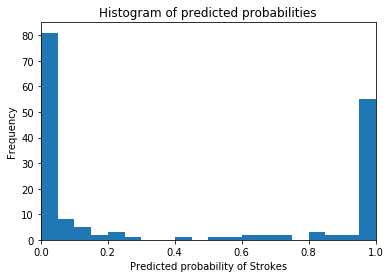

In [24]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Strokes')
plt.ylabel('Frequency')

In [25]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))              #just predict will return 1's or 0's)
threshold_list = [0.05,0.06,0.08,0.1,0.2,0.3,0.4,0.5,.7,.75,.8,0.9,1]
for i in threshold_list:                                                # recall - senstivity
                                                                        # we choose that 'i' where FP=FN
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing recall is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing recall is 0.87
[[79 21]
 [ 2 69]]

******** For i = 0.06 ******
Our testing recall is 0.88
[[81 19]
 [ 2 69]]

******** For i = 0.08 ******
Our testing recall is 0.88
[[83 17]
 [ 3 68]]

******** For i = 0.1 ******
Our testing recall is 0.89
[[85 15]
 [ 4 67]]

******** For i = 0.2 ******
Our testing recall is 0.92
[[91  9]
 [ 5 66]]

******** For i = 0.3 ******
Our testing recall is 0.94
[[95  5]
 [ 5 66]]

******** For i = 0.4 ******
Our testing recall is 0.94
[[95  5]
 [ 5 66]]

******** For i = 0.5 ******
Our testing recall is 0.94
[[95  5]
 [ 6 65]]

******** For i = 0.7 ******
Our testing recall is 0.94
[[98  2]
 [ 9 62]]

******** For i = 0.75 ******
Our testing recall is 0.94
[[99  1]
 [10 61]]

******** For i = 0.8 ******
Our testing recall is 0.94
[[99  1]
 [10 61]]

******** For i = 0.9 ******
Our testing recall is 0.92
[[100   0]
 [ 14  57]]

******** For i = 1 ******
Our testing recall is 0.58
[[100   0]
 [ 71   0]]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [26]:
y_scores = logreg.predict_proba(X_test)[:, 1]

In [27]:
# adjusted classes to get graph for the value at which we want the recall_score
def adjusted_classes(y_scores,t):
    """
    This func adjusts class predction based on the prediction threshold(t).
    Will only work for binary classification problems.
    
    """
    return [1 if y>=t else 0 for y in y_scores]



def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,t=0.3):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix



In [29]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

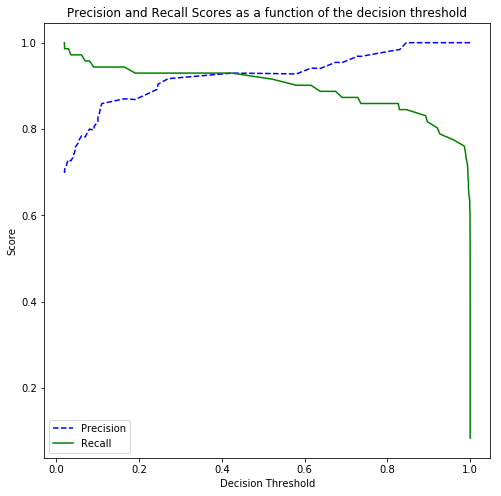

In [30]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
shallow_tree=DecisionTreeClassifier(max_depth=2,random_state=100)

In [34]:
#adaboost with tree as base estimator

estimators=list(range(1,50,3))

abc_scores=[]
for n_est in estimators:
    ABC= AdaBoostClassifier(
    base_estimator=shallow_tree,
    n_estimators=n_est)
    
    ABC.fit(X_train,y_train)
    y_pred=ABC.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    abc_scores.append(score)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [43]:
abc_scores

[0.8888888888888888,
 0.9181286549707602,
 0.935672514619883,
 0.9181286549707602,
 0.9064327485380117,
 0.9532163742690059,
 0.935672514619883,
 0.9590643274853801,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9298245614035088,
 0.9532163742690059,
 0.935672514619883,
 0.9532163742690059,
 0.9590643274853801,
 0.9590643274853801]

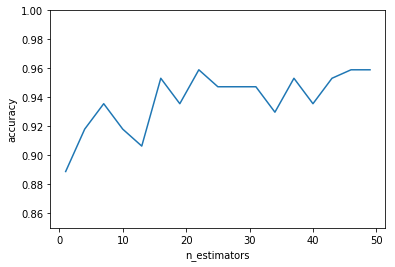

In [46]:
#plot test scores and n_estimators


#plot
plt.plot(estimators,abc_scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.ylim([0.85,1])
plt.show()